In [1]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#loading the MNIST dataset
(x_train, y_train), (x_test, y_test) = load_data()
#reshaping the training and testing data
x_train=x_train.reshape((x_train.shape[0], x_train.shape[1],
                        x_train.shape[2], 1))
x_test=x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2], 1))

In [3]:
#normalising the values of pixels of images
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

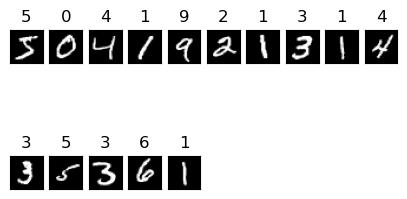

In [4]:
fig=plt.figure(figsize=(5,3))
for i in range(15):
    ax=fig.add_subplot(2,10, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='gray')
    ax.set_title(y_train[i])

In [5]:
#determine the shape of the input images
img_shape=x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [6]:
#defining the model
model=Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=img_shape))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

In [13]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [8]:
plot_model(model, 'model.jpg', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x=model.fit(x_train,y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 8s - loss: 0.2383 - accuracy: 0.9279 - val_loss: 0.0622 - val_accuracy: 0.9822 - 8s/epoch - 20ms/step
Epoch 2/10
422/422 - 8s - loss: 0.0797 - accuracy: 0.9746 - val_loss: 0.0370 - val_accuracy: 0.9907 - 8s/epoch - 19ms/step
Epoch 3/10
422/422 - 8s - loss: 0.0581 - accuracy: 0.9821 - val_loss: 0.0301 - val_accuracy: 0.9925 - 8s/epoch - 18ms/step
Epoch 4/10
422/422 - 7s - loss: 0.0462 - accuracy: 0.9852 - val_loss: 0.0307 - val_accuracy: 0.9917 - 7s/epoch - 17ms/step
Epoch 5/10
422/422 - 7s - loss: 0.0392 - accuracy: 0.9878 - val_loss: 0.0327 - val_accuracy: 0.9922 - 7s/epoch - 17ms/step
Epoch 6/10
422/422 - 7s - loss: 0.0344 - accuracy: 0.9886 - val_loss: 0.0279 - val_accuracy: 0.9928 - 7s/epoch - 17ms/step
Epoch 7/10
422/422 - 7s - loss: 0.0314 - accuracy: 0.9899 - val_loss: 0.0305 - val_accuracy: 0.9925 - 7s/epoch - 18ms/step
Epoch 8/10
422/422 - 7s - loss: 0.0269 - accuracy: 0.9909 - val_loss: 0.0268 - val_accuracy: 0.9918 - 7s/epoch - 18ms/step
Epoch 9/10
422/4

In [11]:
loss, accuracy=model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.26000237464905


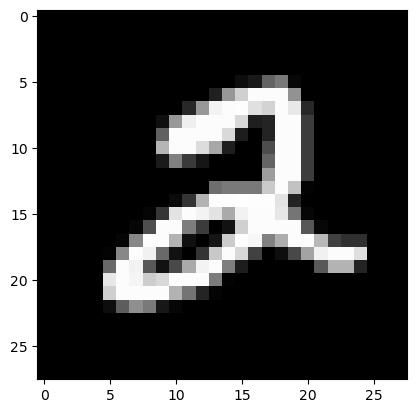

In [12]:
image=x_train[5]
#lets display the image which we want to predict
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [13]:
image= image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
p=model.predict([image])
print('Predicted: {}'.format(argmax(p)))

1/1 [==============================] - 0s 51ms/step
Predicted: 2


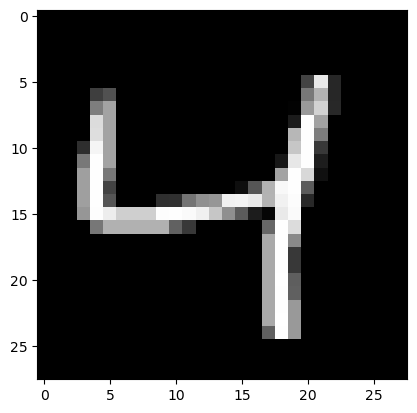

1/1 [==============================] - 0s 9ms/step
Predicted: 4


In [17]:
image=x_train[2]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()
image= image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
p=model.predict([image])
print('Predicted: {}'.format(argmax(p)))